In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the path to the folder containing your CSV files
folder_path = R"C:\Users\andre\OneDrive - Alma Mater Studiorum Università di Bologna\University\UniBo\Machine Learning\PR2.20\data"

# List all files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv") if file != 'InfoComune.csv']

# Create an empty dictionary to store DataFrames
dataframes = {}

# Iterate through each CSV file
for file in csv_files:
    # Extract the file name (excluding .csv)
    df_name = os.path.splitext(file)[0]
    
    # Create the DataFrame and store it in the dictionary
    dataframes[df_name] = pd.read_csv(os.path.join(folder_path, file), header=1, skiprows = 0)


In [ ]:
dataframes['bologna']

In [ ]:
for df in dataframes:
    # change missing values to the proper format
    dataframes[df].replace('---', pd.NA, inplace = True)
    # ensure a unique format
    dataframes[df] = dataframes[df].convert_dtypes()

In [ ]:
dataframes['bologna']

In [ ]:
# create a date variable for all the dataframes
for province, df in dataframes.items():
    # Combine 'YYYY', 'MM', 'DD' columns into a new 'date' column
    df['date'] = pd.to_datetime(df[['YYYY', 'MM', 'DD']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
    
    # Remove 'YYYY', 'MM', 'DD' columns
    df.drop(['YYYY', 'MM', 'DD'], axis=1, inplace=True)
    
    # Reorder columns with 'date' as the first column
    dataframes[province] = df[['date'] + [col for col in df.columns if col != 'date']]

In [ ]:
dataframes['bologna']

In [ ]:
# Create an empty list to store modified dataframes
dfs = []

# Iterate through the dictionary items
for province, df in dataframes.items():
    # Add a 'province' column with the current province name
    df['province'] = province
    # Append the modified dataframe to the list
    dfs.append(df)

In [ ]:
# Concatenate all dataframes in the list along the rows
full_df = pd.concat(dfs, ignore_index=True)
full_df

In [ ]:
# bring province at the beginning
full_df = full_df[['province'] + [col for col in full_df.columns if col != 'province']]
full_df

In [ ]:
# Reset the index of the final dataframe to ensure it's not distorted by concatenation
full_df.reset_index(drop=True, inplace=True)
full_df

In [ ]:
# we probably don't need all the columns, so let's try and keep only the first ones
columns_to_keep = ['province', 'date', 'COM', 'GP', 'A[km2]', 'TG', 'TN', 'TX', 'HU', 'PP', 'QQ', 'RR']
full_df = full_df[columns_to_keep]

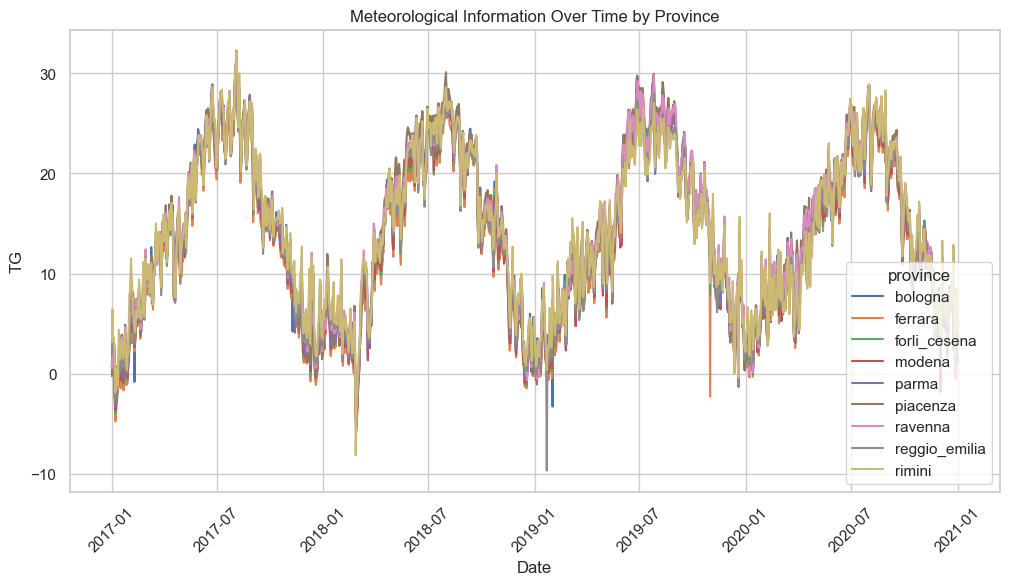

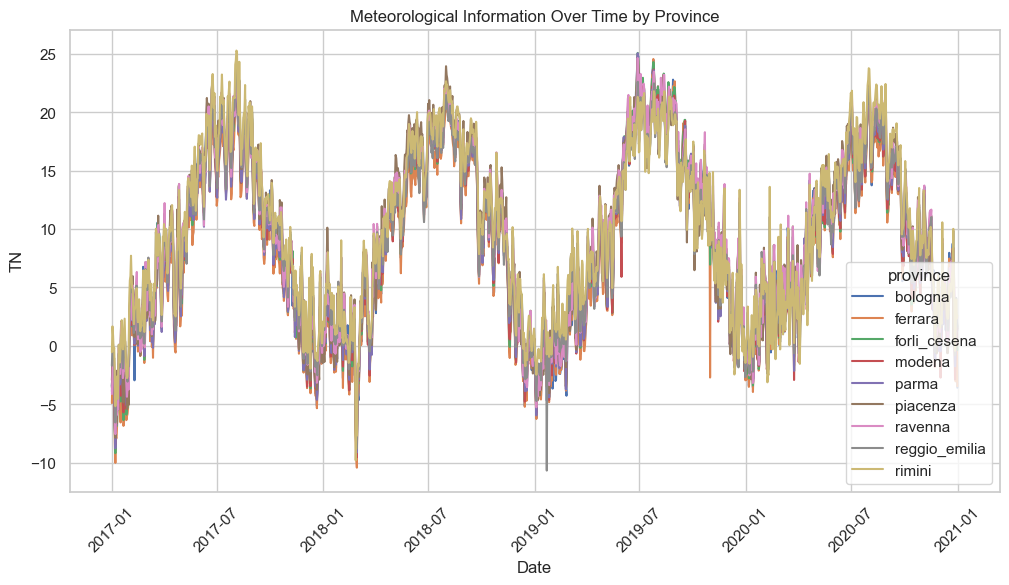

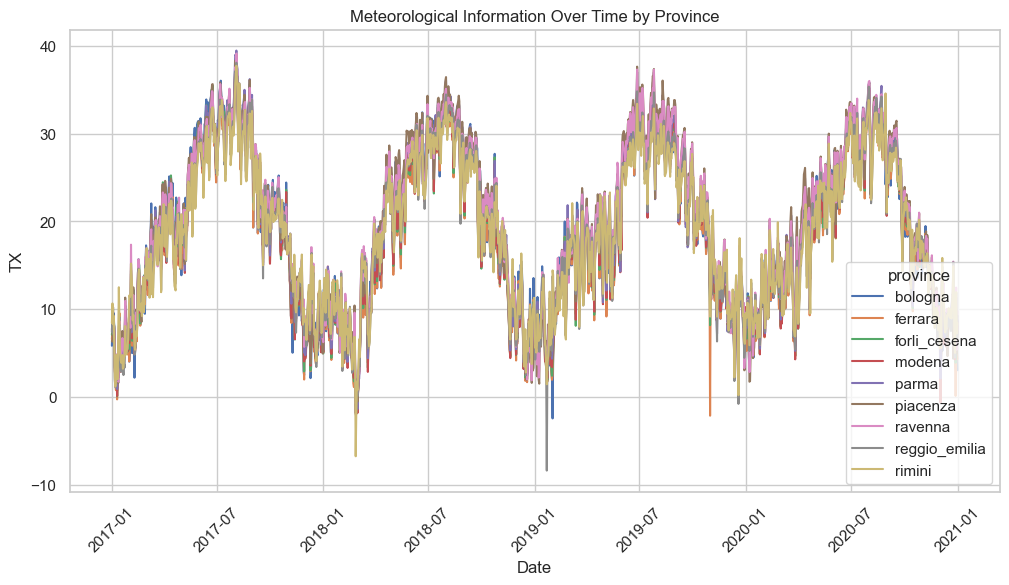

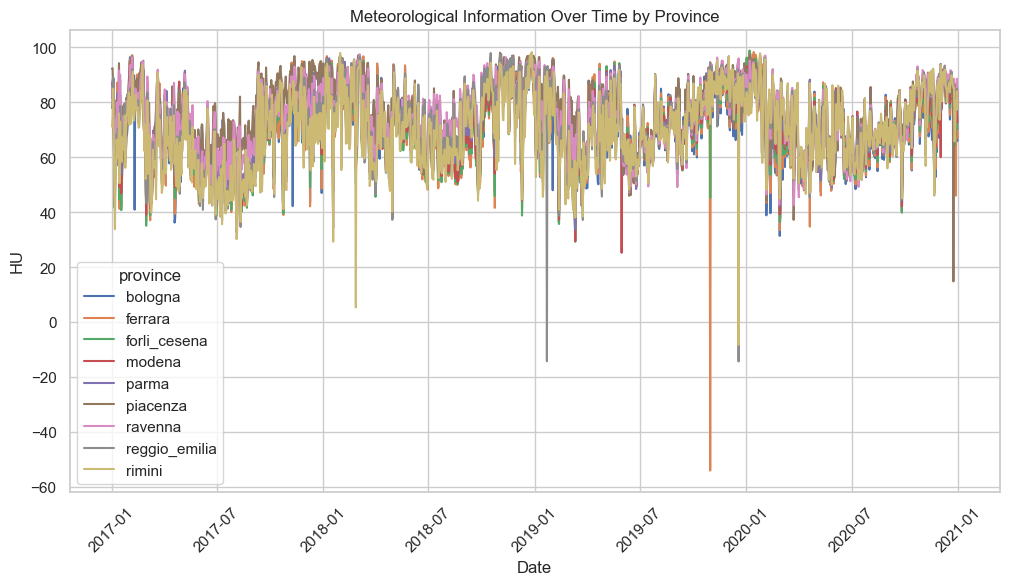

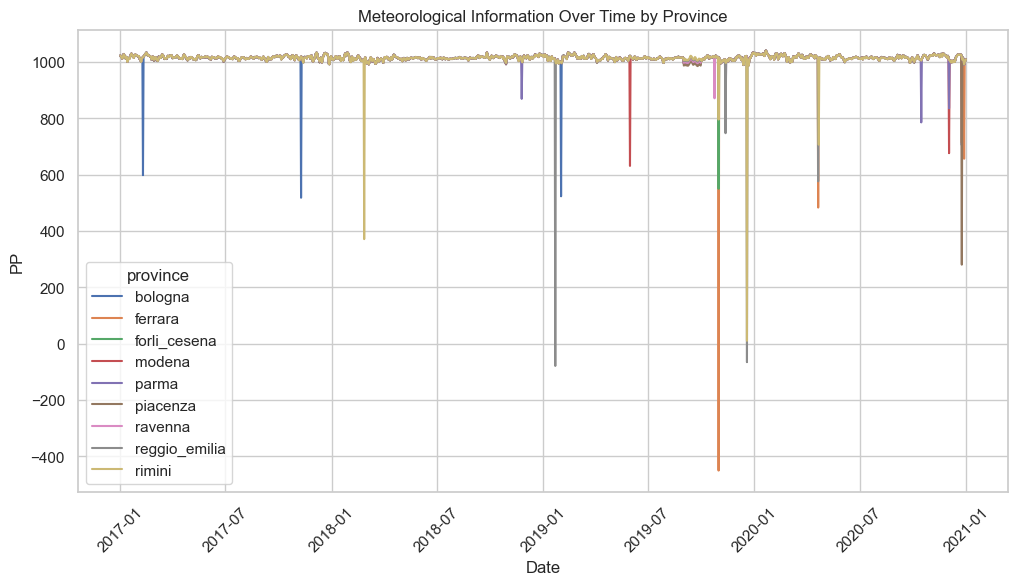

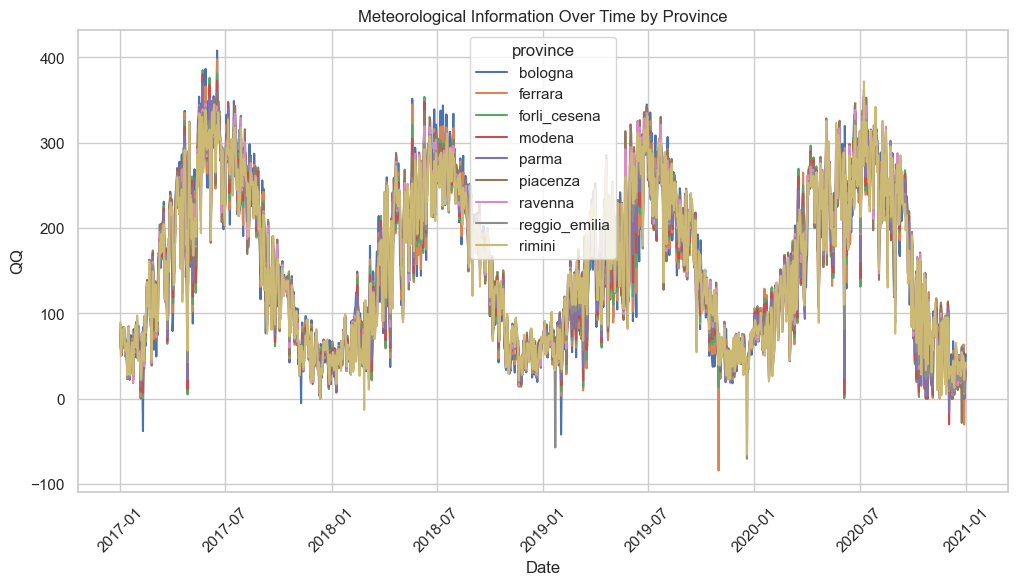

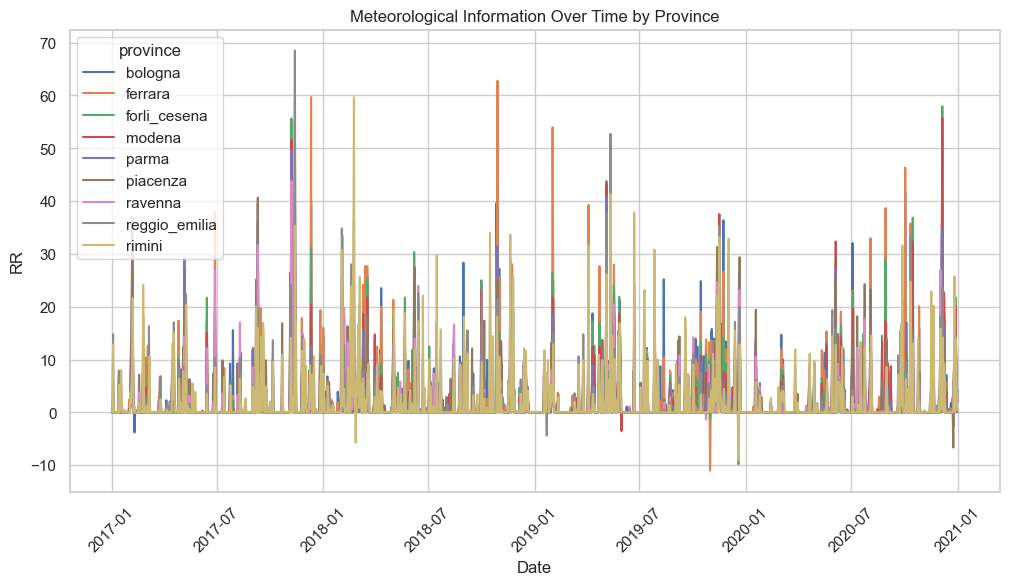

In [16]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

for var in columns_to_keep[5:]:
    
    # Plot the time series for each province
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y=var, hue='province', data=full_df)

    # You can customize the above lineplot by replacing 'your_metereological_column'
    # with the actual column name containing meteorological information that you want to visualize.

    plt.title('Meteorological Information Over Time by Province')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()